How to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

In [2]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Import Data

In [3]:
path ='../Dataset/'

In [4]:
path1 = '../Model/'

In [5]:
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Keterangan:
*   Survival : 0=No, 1= Yes
*   pclass : Tiket class
*   Sex : Jenis Kelamin
*   Age : Umur
*   SibSp : saudara/pasangan di kapal titanic
*   Parch : orang tua/anak di kapal titanic
*   ticket : nomer tiket
*   Fare : tarif tiket
*   Cabin : nomer kabin
*   embarked : Pelabuhan (C=Cherbourg, Q=Queenstown, S=Southampton)

In [8]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [9]:
train_data.info()
print("_"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [10]:
### Predictor
col_cat = ['Pclass', 'Sex', 'Embarked']
col_num = ['Age', 'SibSp', 'Parch', 'Fare']
other_col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
col_target = ['Survived']

In [11]:
# Check Unique value in categorical columns
for col in col_cat:
  print('{} has {} values'.format(col, train_data[col].unique()))
  print('\n')

Pclass has [3 1 2] values


Sex has ['male' 'female'] values


Embarked has ['S' 'C' 'Q' nan] values




In [12]:
# Check Unique value in categorical columns
for col in col_cat:
  print('{} has {} values'.format(col, test_data[col].unique()))
  print('\n')

Pclass has [3 2 1] values


Sex has ['male' 'female'] values


Embarked has ['Q' 'S' 'C'] values




In [13]:
# Check Missing Value value in numerical columns
train_data[col_num].isnull().sum()

Age      177
SibSp      0
Parch      0
Fare       0
dtype: int64

In [14]:
# Check Missing Value value in numerical columns
test_data[col_num].isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
dtype: int64

In [15]:
train_data.drop(["Ticket", "Cabin"], axis=1, inplace=True)
test_data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
combine = [train_data, test_data]

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## Analyze by pivoting features

In [18]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

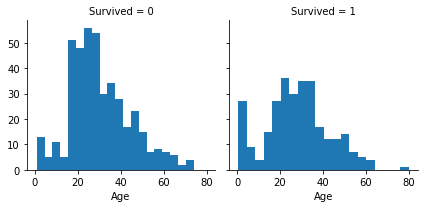

In [22]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


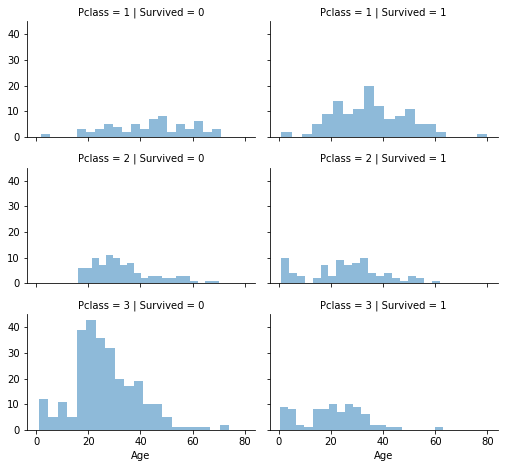

In [23]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


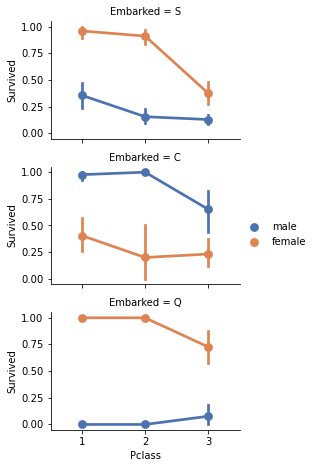

In [24]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


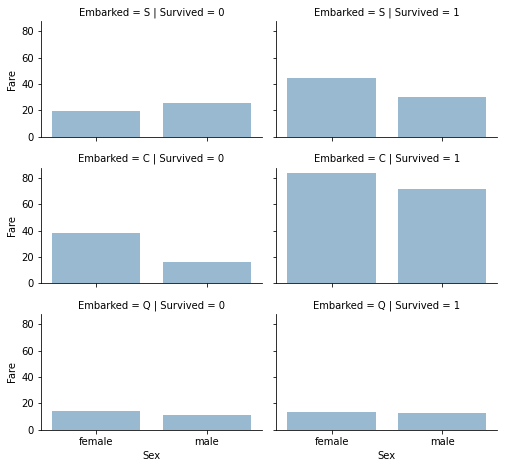

In [25]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

## Creating new feature extracting from existing

In [26]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
# Convert the categorical titles to ordinal
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [29]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

## Converting a categorical feature

In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

C:\Users\W1NDOWS10\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


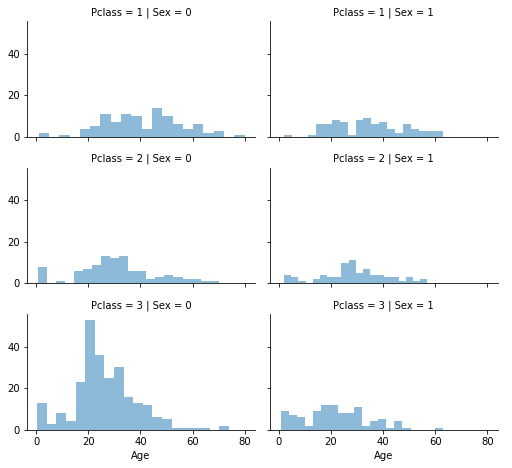

In [31]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [32]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
# iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_data = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_data.mean()
            # age_std = guess_data.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_data.median()
            
            # Convert random age float to nearest 0.5 age
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [34]:
# Create Age Bands and determine correlation with Survived
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
# Replace Age with ordinal band
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [36]:
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## Create new feature combining existing features

In [37]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [38]:
# create another feature called IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [39]:
train_data = train_data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [40]:
# create an artificial feature combining Pclass and Age
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


## Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [41]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Converting categorical feature to numeric

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,2,1,0,3
1,1,1,1,2,71.2833,0,3,0,2
2,1,3,1,1,7.9250,2,2,1,3
3,1,1,1,2,53.1000,2,3,0,2
4,0,3,0,2,8.0500,2,1,1,6


## Quick completing and converting a numeric feature

In [44]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,1,1.0,1,6
1,893,3,1,2,7.0000,2,3.0,0,6
2,894,2,0,3,9.6875,1,1.0,1,6
3,895,3,0,1,8.6625,2,1.0,1,3
4,896,3,1,1,12.2875,2,3.0,0,3


In [45]:
# create FareBand
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data =train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,1,0,3
1,1,1,1,2,3,0,3,0,2
2,1,3,1,1,1,2,2,1,3
3,1,1,1,2,3,2,3,0,2
4,0,3,0,2,1,2,1,1,6


In [47]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,1,1.0,1,6
1,893,3,1,2,0,2,3.0,0,6
2,894,2,0,3,1,1,1.0,1,6
3,895,3,0,1,1,2,1.0,1,3
4,896,3,1,1,1,2,3.0,0,3


## Model, predict and solve

In [48]:
X_train = train_data.drop(['Survived'], axis=1) 
Y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId'], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [49]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.37

In [50]:
# Corelation
coeff_data = pd.DataFrame(train_data.columns.delete(0))
coeff_data.columns = ['Feature']
coeff_data['Correlation'] = pd.Series(logreg.coef_[0])

coeff_data.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.219113
5,Title,0.419188
6,IsAlone,0.205488
7,Age*Class,-0.040203
3,Fare,-0.096277
4,Embarked,-0.277847
2,Age,-0.486190
0,Pclass,-1.182464


In [51]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.94

In [52]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.61

In [53]:
# Naive Bayes classifier
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2) 
acc_gaussian

76.21

In [54]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

62.74

In [55]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\W1NDOWS10\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.46

In [56]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.86

In [57]:
# Decision Tree
decision_tree =DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [64]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

## Model Evaluation

In [59]:
models = pd.DataFrame({
    'model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, 
              acc_decision_tree]})
models.sort_values(by='score', ascending=False).reset_index().drop(['index'], axis=1)

,model,score
0,Decision Tree,86.64
1,Random Forest,85.86
2,KNN,83.61
3,Support Vector Machines,82.94
4,Logistic Regression,81.37
5,Linear SVC,79.46
6,Naive Bayes,76.21
7,Stochastic Gradient Decent,74.86
8,Perceptron,62.74


In [61]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived' : Y_pred
})

submission.to_csv('../Output/submission.csv', index=False)

## Model 2

In [78]:
X_train1 = train_data.drop(['Survived', 'Age*Class', 'Fare', 'Embarked', 'Age', 'Pclass'], axis=1) 
Y_train1 = train_data['Survived']
X_test1 = test_data.drop(['PassengerId', 'Age*Class', 'Fare', 'Embarked', 'Age', 'Pclass'], axis=1)
X_train1.shape, Y_train1.shape, X_test1.shape

((891, 3), (891,), (418, 3))

In [79]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Y_pred = logreg.predict(X_test1)
acc_log = round(logreg.score(X_train1, Y_train1)*100, 2)
acc_log

77.55

In [80]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train1, Y_train1)
Y_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_train1, Y_train1) * 100, 2)
acc_svc

79.35

In [81]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, Y_train1)
Y_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_train1, Y_train1) * 100, 2)
acc_knn

78.56

In [82]:
# Naive Bayes classifier
gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_train1, Y_train1) * 100, 2) 
acc_gaussian

78.23

In [83]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train1, Y_train1)
Y_pred = perceptron.predict(X_test1)
acc_perceptron = round(perceptron.score(X_train1, Y_train1) * 100, 2)
acc_perceptron

78.68

In [84]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train1, Y_train1)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(linear_svc.score(X_train1, Y_train1) * 100, 2)
acc_linear_svc

77.78

In [85]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train1, Y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd = round(sgd.score(X_train1, Y_train1) * 100, 2)
acc_sgd

78.23

In [86]:
# Decision Tree
decision_tree =DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_train1, Y_train1) * 100, 2)
acc_decision_tree

79.35

In [87]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train1, Y_train1)
Y_pred = random_forest.predict(X_test1)
acc_random_forest = round(random_forest.score(X_train1, Y_train1) * 100, 2)
acc_random_forest

79.35

In [88]:
models = pd.DataFrame({
    'model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, 
              acc_decision_tree]})
models.sort_values(by='score', ascending=False).reset_index().drop(['index'], axis=1)

,model,score
0,Support Vector Machines,79.35
1,Random Forest,79.35
2,Decision Tree,79.35
3,Perceptron,78.68
4,KNN,78.56
5,Naive Bayes,78.23
6,Stochastic Gradient Decent,78.23
7,Linear SVC,77.78
8,Logistic Regression,77.55
